<a href="https://colab.research.google.com/github/abxda/python-stats/blob/main/STAT_Semana_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Introducción

Este cuaderno cubre los conceptos fundamentales de probabilidad multivariable y cómo se relacionan las variables entre sí. Exploraremos conceptos como media, varianza, covarianza, correlación y regresión lineal, acompañados de ejemplos prácticos en Python.

#### 1. Media
La media aritmética es el promedio de un conjunto de números y se calcula sumando todos los valores y dividiendo el resultado por el número de valores.

**Fórmula:**
$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$

**Ejemplo en Python:**

La media es: 6.8


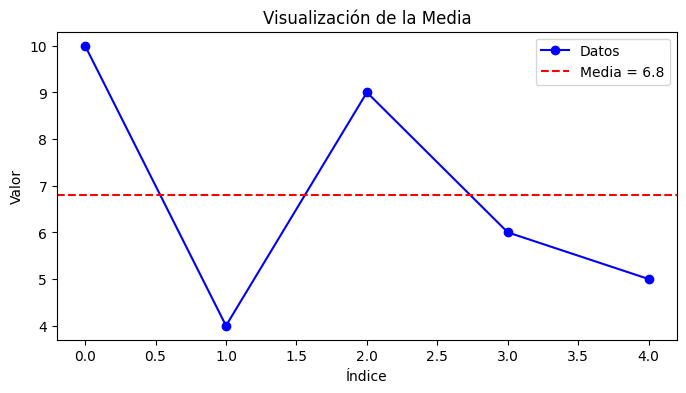

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de datos
datos = [10, 4, 9, 6, 5]

# Cálculo de la media
media = np.mean(datos)
print(f"La media es: {media}")

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(datos, 'bo-', label='Datos')
plt.axhline(y=media, color='r', linestyle='--', label=f'Media = {media}')
plt.title('Visualización de la Media')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

#### 2. Varianza
La varianza mide la dispersión de los datos en relación con la media. Se calcula como el promedio de las diferencias al cuadrado de cada valor con respecto a la media.

**Fórmula:**
$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$

**Ejemplo en Python:**

La varianza es: 5.36


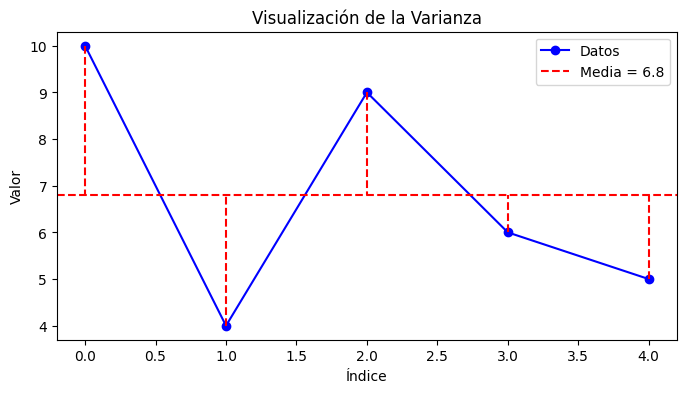

In [ ]:
# Cálculo de la varianza
varianza = np.var(datos)
print(f"La varianza es: {varianza}")

# Visualización de la dispersión de los datos
plt.figure(figsize=(8, 4))
plt.plot(datos, 'bo-', label='Datos')
for i, v in enumerate(datos):
    plt.plot([i, i], [v, media], 'r--')
plt.axhline(y=media, color='r', linestyle='--', label=f'Media = {media}')
plt.title('Visualización de la Varianza')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

#### 3. Covarianza
La covarianza es una medida estadística que describe cómo dos variables cambian juntas. Nos ayuda a entender si hay una relación entre las variables y, si existe, cómo se comportan en relación una con la otra.

- **Covarianza positiva**: Si la covarianza es positiva, significa que cuando una variable aumenta, la otra también tiende a aumentar. En otras palabras, las variables se mueven en la misma dirección.
  
- **Covarianza negativa**: Si la covarianza es negativa, significa que cuando una variable aumenta, la otra tiende a disminuir. En este caso, las variables se mueven en direcciones opuestas.

- **Covarianza cercana a cero**: Una covarianza cercana a cero indica que no hay una relación lineal clara entre las variables, es decir, los cambios en una variable no están consistentemente asociados con cambios en la otra.

Es importante destacar que la covarianza indica la dirección de la relación entre las variables, pero no su magnitud o fuerza. Para medir la fuerza de la relación, se utiliza el coeficiente de correlación, que es una versión normalizada de la covarianza.

**Ejemplo intuitivo**:
Imagina que tienes dos variables, el número de horas que estudias por semana y tus calificaciones en los exámenes. Si a medida que aumentan tus horas de estudio también aumentan tus calificaciones, entonces la covarianza entre estas dos variables sería positiva. Por otro lado, si estudiar más horas se asocia con obtener calificaciones más bajas, la covarianza sería negativa.

Esta medida nos ayuda a identificar patrones de comportamiento conjuntos entre dos conjuntos de datos, lo que es útil en muchos análisis de datos y modelos predictivos.


**Fórmula:**
$
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$

**Ejemplo en Python:**

Covarianza calculada manualmente: 2.2800000000000002
Covarianza calculada con numpy: 2.2800000000000007


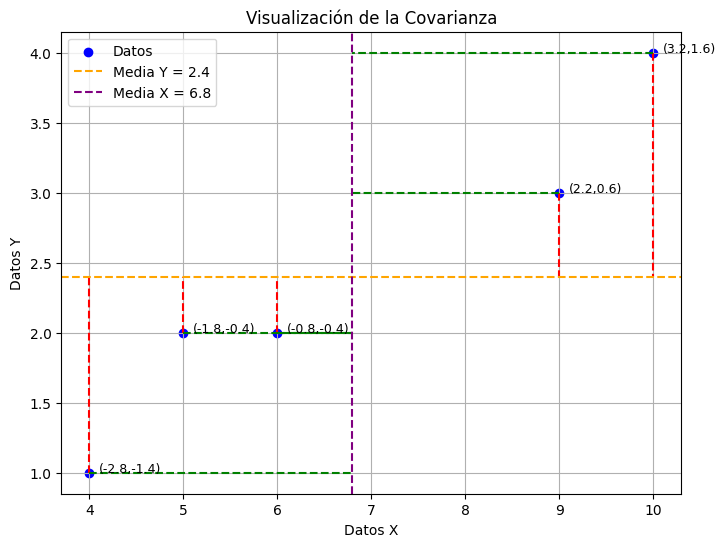

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de dos conjuntos de datos
datos_x = [10, 4, 9, 6, 5]
datos_y = [4, 1, 3, 2, 2]

# Cálculo de la media de cada conjunto de datos
media_x = np.mean(datos_x)
media_y = np.mean(datos_y)

# Cálculo de la covarianza manualmente
desviaciones_x = np.array(datos_x) - media_x
desviaciones_y = np.array(datos_y) - media_y
productos_desviaciones = desviaciones_x * desviaciones_y
covarianza_manual = np.mean(productos_desviaciones)
print(f"Covarianza calculada manualmente: {covarianza_manual}")

# Cálculo de la covarianza utilizando numpy para comparación
covarianza_numpy = np.cov(datos_x, datos_y, ddof=0)[0, 1]

print(f"Covarianza calculada con numpy: {covarianza_numpy}")

# Visualización de la covarianza
plt.figure(figsize=(8, 6))
plt.scatter(datos_x, datos_y, c='blue', label='Datos')

# Dibujar las desviaciones desde cada punto a las medias
for i in range(len(datos_x)):
    plt.plot([datos_x[i], datos_x[i]], [datos_y[i], media_y], 'r--')
    plt.plot([datos_x[i], media_x], [datos_y[i], datos_y[i]], 'g--')

# Marcar las medias
plt.axhline(y=media_y, color='orange', linestyle='--', label=f'Media Y = {media_y}')
plt.axvline(x=media_x, color='purple', linestyle='--', label=f'Media X = {media_x}')

# Añadir anotaciones para clarificar
for i in range(len(datos_x)):
    plt.text(datos_x[i] + 0.1, datos_y[i], f"({desviaciones_x[i]:.1f},{desviaciones_y[i]:.1f})", fontsize=9)

# Título y etiquetas
plt.title('Visualización de la Covarianza')
plt.xlabel('Datos X')
plt.ylabel('Datos Y')
plt.grid(True)
plt.legend()

# Mostrar la gráfica
plt.show()


La covarianza se calcula como el promedio de los productos de las diferencias de cada par de valores respecto a sus medias. Estos productos son importantes porque nos indican cómo dos variables se mueven en relación una con la otra: si ambas tienden a aumentar o disminuir al mismo tiempo (covarianza positiva) o si una aumenta mientras la otra disminuye (covarianza negativa).

$
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$

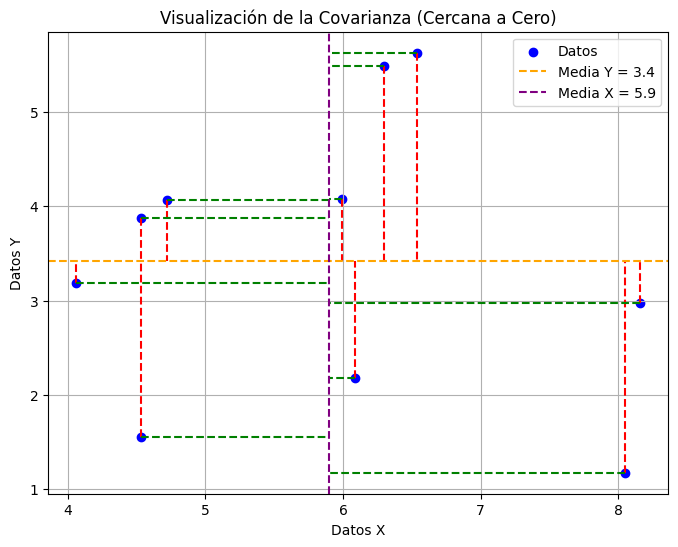

(-0.21726258282087993, -0.2172625828208799)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos dos conjuntos de datos con covarianza cercana a cero
# Aquí creamos un conjunto de datos aleatorios donde no hay relación lineal clara
np.random.seed(42)
datos_x = np.random.normal(5, 2, 10)  # Media 5, desviación estándar 2, 10 puntos
datos_y = np.random.normal(5, 2, 10)  # Media 5, desviación estándar 2, 10 puntos

# Cálculo de la media de cada conjunto de datos
media_x = np.mean(datos_x)
media_y = np.mean(datos_y)

# Cálculo de la covarianza manualmente sin corrección de Bessel
desviaciones_x = datos_x - media_x
desviaciones_y = datos_y - media_y
productos_desviaciones = desviaciones_x * desviaciones_y
covarianza_manual_sin_bessel = np.sum(productos_desviaciones) / len(datos_x)

# Cálculo de la covarianza utilizando numpy sin corrección de Bessel (ddof=0)
covarianza_numpy_sin_bessel = np.cov(datos_x, datos_y, ddof=0)[0, 1]

# Visualización de la covarianza
plt.figure(figsize=(8, 6))
plt.scatter(datos_x, datos_y, c='blue', label='Datos')

# Dibujar las desviaciones desde cada punto a las medias
for i in range(len(datos_x)):
    plt.plot([datos_x[i], datos_x[i]], [datos_y[i], media_y], 'r--')
    plt.plot([datos_x[i], media_x], [datos_y[i], datos_y[i]], 'g--')

# Marcar las medias
plt.axhline(y=media_y, color='orange', linestyle='--', label=f'Media Y = {media_y:.1f}')
plt.axvline(x=media_x, color='purple', linestyle='--', label=f'Media X = {media_x:.1f}')

# Título y etiquetas
plt.title("Visualización de la Covarianza (Cercana a Cero)")
plt.xlabel("Datos X")
plt.ylabel("Datos Y")
plt.grid(True)
plt.legend()

# Mostrar la gráfica
plt.show()

covarianza_manual_sin_bessel, covarianza_numpy_sin_bessel


#### 4. Correlación
La correlación es una medida estadística que cuantifica la fuerza y la dirección de la relación lineal entre dos variables. A diferencia de la covarianza, que solo indica la dirección de la relación, la correlación también nos dice cuán fuerte es esa relación.

- **Correlación positiva**: Si el coeficiente de correlación es positivo, significa que a medida que una variable aumenta, la otra también tiende a aumentar. Cuanto más cercano a 1 sea el coeficiente, más fuerte es la relación positiva.
  
- **Correlación negativa**: Si el coeficiente de correlación es negativo, significa que a medida que una variable aumenta, la otra tiende a disminuir. Cuanto más cercano a -1 sea el coeficiente, más fuerte es la relación negativa.

- **Correlación cercana a cero**: Un coeficiente de correlación cercano a 0 indica que no hay una relación lineal clara entre las variables. Es decir, los cambios en una variable no están asociados de manera consistente con los cambios en la otra.

El coeficiente de correlación de Pearson es el más utilizado y se calcula como la covarianza entre las dos variables dividida por el producto de sus desviaciones estándar. Este coeficiente siempre está en el rango de -1 a 1.

**Fórmula:**
$
\rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$
Donde:
- $\text{Cov}(X, Y)$ es la covarianza entre las variables $X$ y $Y$.
- $\sigma_X$ y $\sigma_Y$ son las desviaciones estándar de $X$ y $Y$, respectivamente.

**Interpretación del coeficiente de correlación de Pearson:**
- $\rho = 1$: Correlación positiva perfecta.
- $\rho = -1$: Correlación negativa perfecta.
- $\rho = 0$: No hay correlación lineal.

**Ejemplo intuitivo**:
Imagina que estás observando la relación entre la temperatura y la venta de helados. Si a medida que la temperatura aumenta, las ventas de helados también aumentan, entonces la correlación entre estas dos variables sería positiva y posiblemente fuerte. Por otro lado, si estás observando la relación entre la temperatura y la venta de ropa de invierno, podrías encontrar una correlación negativa, ya que a medida que la temperatura sube, la venta de ropa de invierno tiende a disminuir.

**Ejemplo en Python:**


La correlación de Pearson es: 0.9656856602896686


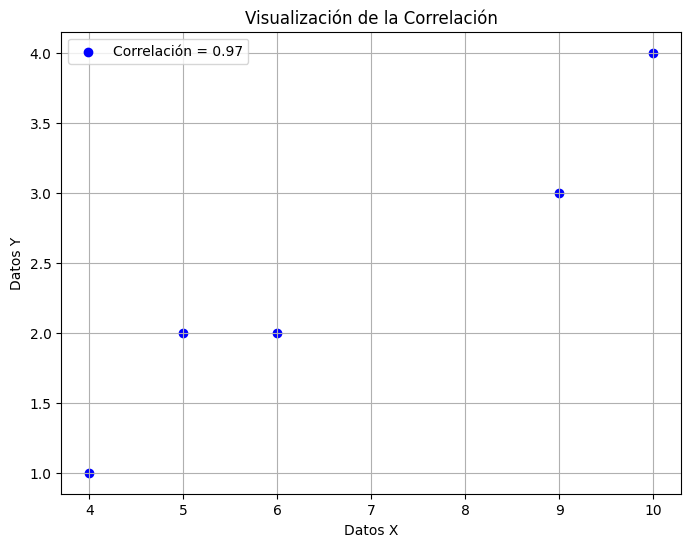

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de dos conjuntos de datos
datos_x = [10, 4, 9, 6, 5]
datos_y = [4, 1, 3, 2, 2]

# Cálculo de la correlación utilizando numpy
correlacion = np.corrcoef(datos_x, datos_y)[0, 1]
print(f"La correlación de Pearson es: {correlacion}")

# Visualización de la correlación
plt.figure(figsize=(8, 6))
plt.scatter(datos_x, datos_y, c='blue', label=f'Correlación = {correlacion:.2f}')
plt.title('Visualización de la Correlación')
plt.xlabel('Datos X')
plt.ylabel('Datos Y')
plt.grid(True)
plt.legend()
plt.show()



#### 5. Regresión Lineal
La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente (la que intentamos predecir) y una o más variables independientes (las que usamos para hacer la predicción). En su forma más simple, la regresión lineal es una línea recta que intenta ajustar los datos de la mejor manera posible.

**Fórmula:**
$
y = \beta_0 + \beta_1 x
$
Donde:
- $\beta_0$ es la intersección con el eje $y$ (es decir, el valor de $y$ cuando $x = 0$).
- $\beta_1$ es la pendiente de la línea (indica cuánto cambia $y$ por cada unidad que aumenta $x$).

La regresión lineal busca encontrar los valores de $\beta_0$ y $\beta_1$ que minimicen la diferencia entre los valores predichos y los valores observados en los datos.

### Ejemplo en Python:



La ecuación de la recta es: y = 0.43x + -0.49
Predicciones: [3.76119403 1.20895522 3.3358209  2.05970149 1.63432836]


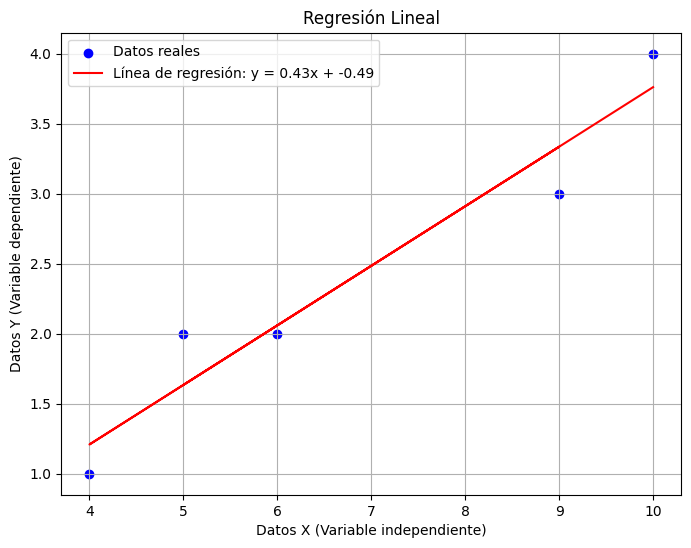

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de dos conjuntos de datos
datos_x = [10, 4, 9, 6, 5]
datos_y = [4, 1, 3, 2, 2]

# Convertir datos a matrices de numpy
X = np.array(datos_x).reshape(-1, 1)
Y = np.array(datos_y)

# Crear modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, Y)

# Parámetros del modelo
pendiente = modelo.coef_[0]
interseccion = modelo.intercept_
print(f"La ecuación de la recta es: y = {pendiente:.2f}x + {interseccion:.2f}")

# Predicción con el modelo
predicciones = modelo.predict(X)
print(f"Predicciones: {predicciones}")

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(datos_x, datos_y, c='blue', label='Datos reales')
plt.plot(datos_x, predicciones, color='red', label=f'Línea de regresión: y = {pendiente:.2f}x + {interseccion:.2f}')
plt.title('Regresión Lineal')
plt.xlabel('Datos X (Variable independiente)')
plt.ylabel('Datos Y (Variable dependiente)')
plt.grid(True)
plt.legend()
plt.show()